In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = {
    'feature1': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 6.4, 6.9, 5.5, 6.5, 5.7, 5.8],
    'feature2': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.2, 3.1, 2.3, 2.8, 2.8, 2.7],
    'feature3': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.1],
    'target':   [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}


df = pd.DataFrame(data)


df.to_csv('/content/drive/MyDrive/Colab Notebooks/dummy_dataset.csv', index=False)




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dummy_dataset.csv')

data.fillna(0, inplace=True)

X = data[['feature1', 'feature2', 'feature3']]
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



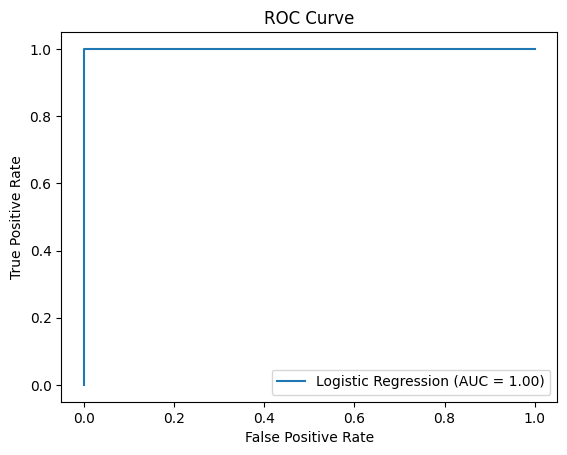

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**TASK**
1. Implement the logistic Regression on housing dataset
2. Take a dataset which can be classified through binary classification, implement the logistic regression using formula based approach
